In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [8]:
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size*aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [9]:
import warnings
warnings.filterwarnings('ignore')

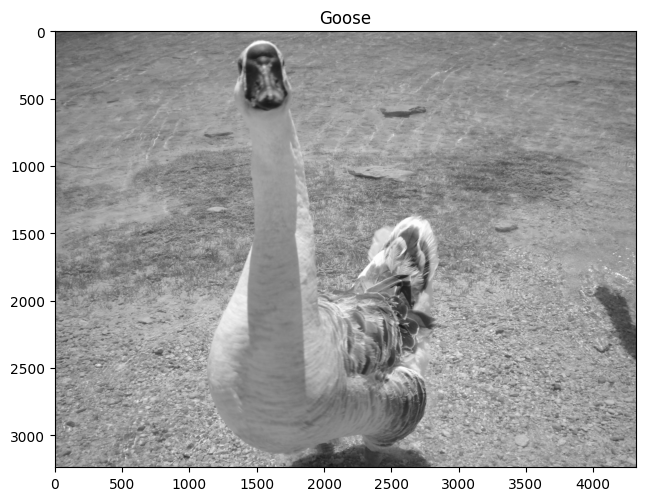

In [10]:
img = cv2.imread('goose.JPG', 0)
imshow("Goose", img)


In [17]:
import numpy as np 
import pandas as pd 
import cv2
from matplotlib import pyplot as plt

def showImage(img):
    plt.figure(figsize=(15,15))
    plt.imshow(img,cmap='gray')
    plt.xticks([]),plt.yticks([])
    plt.show()

In [20]:
def selectQMatrix(qName):
    Q10 = np.array([[80,60,50,80,120,200,255,255],
                [55,60,70,95,130,255,255,255],
                [70,65,80,120,200,255,255,255],
                [70,85,110,145,255,255,255,255],
                [90,110,185,255,255,255,255,255],
                [120,175,255,255,255,255,255,255],
                [245,255,255,255,255,255,255,255],
                [255,255,255,255,255,255,255,255]])
    Q50 = np.array([[16,11,10,16,24,40,51,61],
                [12,12,14,19,26,58,60,55],
                [14,13,16,24,40,57,69,56],
                [14,17,22,29,51,87,80,62],
                [18,22,37,56,68,109,103,77],
                [24,35,55,64,81,104,113,92],
                [49,64,78,87,103,121,120,101],
                [72,92,95,98,112,100,130,99]])
    if qName == "Q10":
        return Q10
    elif qName == "Q50":
        return Q50
    else:
        return np.ones((8,8)) #it suppose to return original image back

In [22]:
height  = len(img) #one column of image
width = len(img[0]) # one row of image
sliced = [] # new list for 8x8 sliced image 
block = 8
print("The image heigh is " +str(height)+", and image width is "+str(width)+" pixels")

#dividing 8x8 parts
currY = 0 #current Y index
for i in range(block,height+1,block):
    currX = 0 #current X index
    for j in range(block,width+1,block):
        sliced.append(img[currY:i,currX:j]-np.ones((8,8))*128) #Extracting 128 from all pixels
        currX = j
    currY = i
    
print("Size of the sliced image: "+str(len(sliced)))
print("Each elemend of sliced list contains a "+ str(sliced[0].shape)+ " element.")

imf = [np.float32(img) for img in sliced]

The image heigh is 3240, and image width is 4320 pixels
Size of the sliced image: 218700
Each elemend of sliced list contains a (8, 8) element.


In [23]:
DCToutput = []
for part in imf:
    currDCT = cv2.dct(part)
    DCToutput.append(currDCT)
DCToutput[0][0]

array([-2.7512500e+02,  1.0283809e+00,  6.0100241e+00, -1.0750563e+00,
       -1.2500000e-01, -2.0455620e+00, -1.8935017e-01, -1.9965561e-01],
      dtype=float32)

In [24]:
selectedQMatrix = selectQMatrix("Q10")
for ndct in DCToutput:
    for i in range(block):
        for j in range(block):
            ndct[i,j] = np.around(ndct[i,j]/selectedQMatrix[i,j])
DCToutput[0][0]

array([-3.,  0.,  0., -0., -0., -0., -0., -0.], dtype=float32)

In [25]:
invList = []
for ipart in DCToutput:
    ipart
    curriDCT = cv2.idct(ipart)
    invList.append(curriDCT)
invList[0][0]

row = 0
rowNcol = []
for j in range(int(width/block),len(invList)+1,int(width/block)):
    rowNcol.append(np.hstack((invList[row:j])))
    row = j
res = np.vstack((rowNcol))

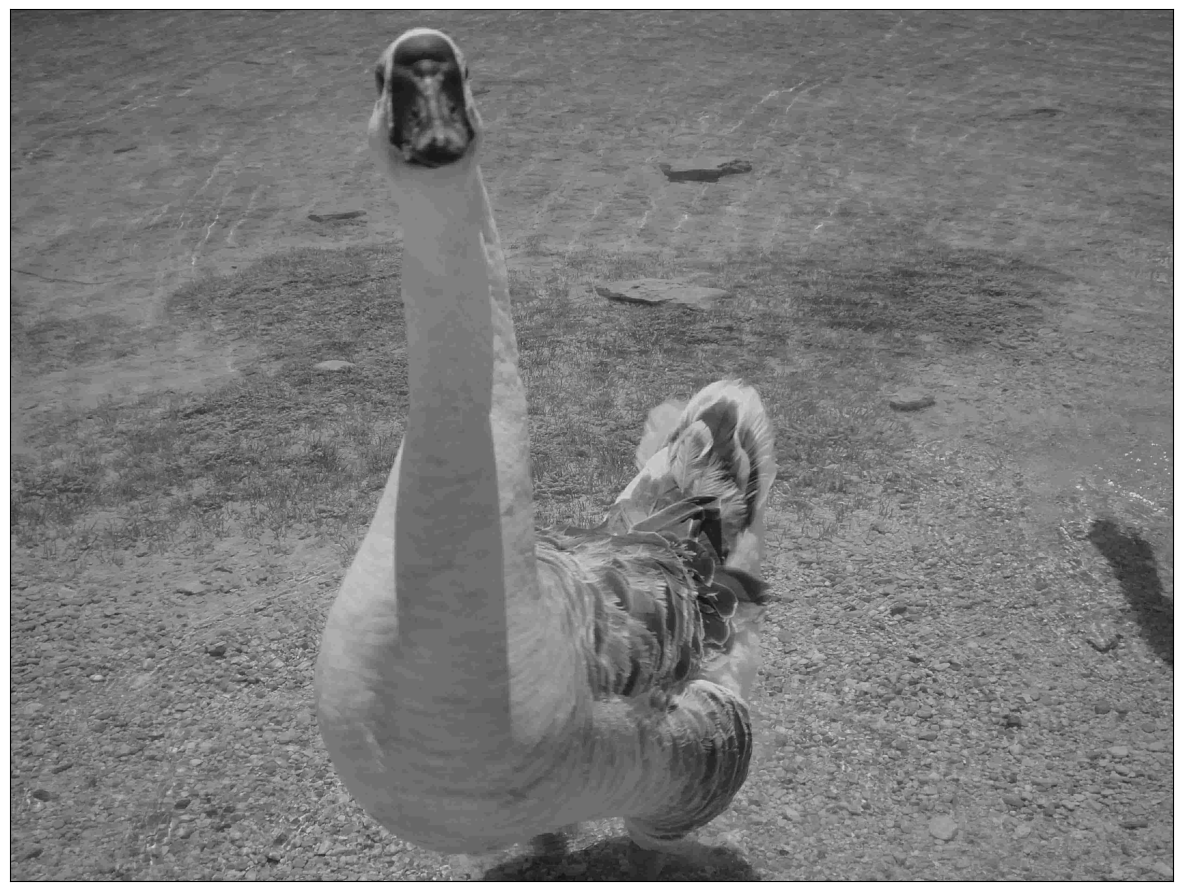

In [26]:
showImage(res)

In [28]:
# read input image as grayscale
img = cv2.imread('goose.JPG', cv2.IMREAD_GRAYSCALE)
# convert the grayscale to float32
imf = np.float32(img) # float conversion
# find discrete cosine transform
dst = cv2.dct(imf, cv2.DCT_INVERSE)
# apply inverse discrete cosine transform
img1 = cv2.idct(dst)
# convert to uint8
img1 = np.uint8(img)
cv2.imshow("DCT", dst)
cv2.waitKey(0)
cv2.imshow("IDCT back image", img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

#####  Task2


In [21]:
import gzip
import shutil

In [26]:
input_file = "to_compress.txt"
output_file = "compressed.txt.gz"

with open(input_file, 'rb') as f_in, gzip.open(output_file, 'wb') as f_out:
    f_out.writelines(f_in)

print("File compression is successful.")

File compression is successful.


#### Task3

In [5]:
import os
import timeit
import array


class Node:  # HEAP NODE CLASS
    def __init__(self, value=None, char=None, left=None, right=None):
        self.value = value
        self.char = char
        self.left = left
        self.right = right

    def is_leaf(self):
        return self.left is None and self.right is None

    def get_value(self):
        return self.value

    def get_char(self):
        return self.char


cwd = os.getcwd()


def compress(path, mode=0):  # COMPRESS FILE DATA
    if mode == 0:
        name = str(os.path.splitext(path)[0])
        data = str(read_file(path), 'utf-8')
        freq_map = frequency_map(data)
        language_map, compressed_header = huffman_coding(freq_map)
        output = encode(data, language_map, compressed_header, mode=mode)
        output = bytes(output, 'UTF-8')
        size = create_output(output, name + ".bin", 0)
    elif mode == 1:
        os.chdir(path)
        data = bytes()
        for file in os.listdir(path):
            if file.endswith(".txt"):
                data += read_file(file, mode=0) + b'\x11\x22\x33'
        data = str(data, 'utf-8')
        freq_map = frequency_map(data)
        language_map, compressed_header = huffman_coding(freq_map)
        output = encode(data, language_map, compressed_header, mode=mode)
        output = bytes(output, 'UTF-8')
        os.chdir('..')
        size = create_output(output, os.path.basename(path) + "_compressed.bin", 0)
        os.chdir(cwd)
    return size


def frequency_map(data):  # FREQUENCY MAP GENERATOR
    frequency = {}
    for character in data:
        if character not in frequency:
            frequency[character] = 1
        else:
            frequency[character] += 1
    return frequency


def huffman_coding(freq_map):  # HUFFMAN CODING ALGORITHM
    freq_map = sorted(freq_map.items(), key=lambda x: x[1])
    nodes = []
    for key, value in freq_map:
        node = Node(value, key)
        nodes.append(node)
    while len(nodes) > 1:
        node1 = nodes[0]
        node2 = nodes[1]
        nodes = nodes[2:]
        sum_node = node1.get_value() + node2.get_value()
        node = Node(sum_node, left=node1, right=node2)
        i = 0
        while i < len(nodes) and node.get_value() > nodes[i].get_value():
            i += 1
        nodes[i:i] = [node]
    compressed_tree = encode_tree(nodes[0], "")
    d = assign_code(nodes[0], '')
    print("Byte\tCode\t\tNew code")
    for key in d.keys():
        print(str(ord(key)) + "\t\t" + f'{(ord(key)):08b}' + "\t" + str(d[key]))
    return d, compressed_tree


def encode_tree(node, code):  # ENCODE TREE FOR HEADER
    if node.is_leaf():
        code += "1"
        code += f"{ord(node.get_char()):08b}"
    else:
        code += "0"
        code = encode_tree(node.left, code)
        code = encode_tree(node.right, code)
    return code


def assign_code(node, code=''):  # ASSIGN CODES TO A HUFFMAN TREE
    if not node.left and not node.right:
        return {node.get_char(): code}
    d = dict()
    d.update(assign_code(node.left, code + '0'))
    d.update(assign_code(node.right, code + '1'))
    return d


def encode(data, language_map, compressed_header, mode=0):  # ENCODE FILE DATA INTO THEIR EQUIVALENT CODES
    compressed_header = str(mode) + compressed_header
    output = ""
    bits = ""
    for char in data:
        bits += language_map[char]
    num = 8 - (len(bits) + len(compressed_header)) % 8
    if num != 0:
        output = num * "0" + bits
    output = f"{compressed_header}{num:08b}{output}"
    return output


def create_output(data, name, mode=0):  # CREATE OUTPUT FILE
    if mode == 0:
        b_arr = bytearray()
        for i in range(0, len(data), 8):
            b_arr.append(int(data[i:i + 8], 2))
        try:
            output_path = open(name, "wb")
            output_path.write(b_arr)
            print("Success, data saved at: " + name)
            return os.stat(name).st_size
        except IOError:
            print("Something went wrong")
            exit(-1)
    else:
        try:
            output_path = open(name, "w", encoding='utf-8', newline='\n')
            output_path.write(data)
            print("Success, data saved at: " + name)
            return os.stat(name).st_size
        except IOError:
            print("Something went wrong")
            exit(-1)


def decompress(path):  # DECOMPRESS FILE DATA
    data = read_file(path, mode=1)
    data = list(data)

    mode = int(data[0])
    del data[0]

    node = decode_tree(data)
    d = assign_code(node)
    reversed_tree = {v: k for k, v in d.items()}

    n_padding = data[:8]
    n_padding = int("".join(n_padding), 2)
    data = data[8:]
    data = data[n_padding:]

    data = decode(data, reversed_tree)

    name = str(os.path.splitext(path)[0])

    if mode == 0:
        output = ""
        for num in data:
            output += format(num, '08b')

        b_arr = bytearray()

        for i in range(0, len(output), 8):
            b_arr.append(int(output[i:i + 8], 2))

        create_output(str(b_arr, 'utf-8'), name + '.txt', mode=1)
    else:
        op_files = array.array('B', data).tobytes().split(b'\x11\x22\x33')
        for i, file in enumerate(op_files[0:len(op_files) - 1]):
            create_output(str(op_files[i][:len(op_files[i])], 'utf-8'), name + str(i) + '.txt', mode=1)


def decode_tree(data):  # DECODE TREE FROM HEADER
    char = data[0]
    del data[0]

    if char == "1":
        byte = ""
        for _ in range(8):
            byte += data[0]
            del data[0]

        return Node(char=int(byte, 2))
    else:
        left = decode_tree(data)
        right = decode_tree(data)

        return Node(None, left=left, right=right)


def decode(data, language_map):  # DECODE FILE DATA FROM THEIR EQUIVALENT CODES
    code = ""
    output = []
    for bit in data:
        code += bit
        if code in language_map:
            output.append(language_map[code])
            code = ""
    return output


def read_file(path, mode=0):  # READ FILE DATA
    f = open(path, 'rb')
    if mode == 0:
        return f.read()
    else:
        data = ""
        byte = f.read(1)
        while len(byte) > 0:
            data += f"{bin(ord(byte))[2:]:0>8}"
            byte = f.read(1)
        return data


if __name__ == '__main__':
    run = True
    print("Enter operation type:")

    while run:
        original_size = 0
        new_size = 0
        # GET OPERATION FROM USER

        while True:
            op = input("Compression of a File (0) | Compression of a Folder (1) | Decompression (2) ")
            if op is None or op == '':
                continue
            else:
                try:
                    op = int(op)
                    if op > 2 or op < 0:
                        print("Please enter one of the mentioned options")
                        continue
                    else:
                        break
                except TypeError:
                    print("Please enter one of the mentioned options")

        if op == 0:  # COMPRESSION OF A FILE
            p = str(input("Enter a file name in the current directory "))
            while True:
                file_path = os.getcwd() + "\\" + p
                if os.path.exists(file_path) and p != '':
                    break
                else:
                    p = input("Enter a valid file name in the current directory ")
                    if p is not None or p != '':
                        p = str(p)
                    else:
                        continue
            file_stats = os.stat(p)
            original_size = file_stats.st_size
            start = timeit.timeit()
            new_size = compress(p, op)
            end = timeit.timeit()
        elif op == 1:  # COMPRESSION OF A FOLDER
            p = str(input("Enter path to the directory "))
            while True:
                if os.path.exists(p):
                    break
                else:
                    p = str(input("Enter a valid path to the directory "))
            os.chdir(p)
            for f_d in os.listdir(p):
                if f_d.endswith(".txt"):
                    original_size += os.stat(f_d).st_size
            os.chdir(cwd)
            start = timeit.timeit()
            new_size = compress(p, op)
            end = timeit.timeit()
        elif op == 2:  # DECOMPRESSION
            p = str(input("Enter a file name in the current directory "))
            while True:
                file_path = os.getcwd() + "\\" + p
                if os.path.exists(file_path):
                    break
                else:
                    p = str(input("Enter a valid file name in the current directory "))
            start = timeit.timeit()
            decompress(p)
            end = timeit.timeit()
        else:
            print("Enter a valid operation type")
            continue
        print("Execution time of the program is ", (str('{:.4f}'.format(abs(end - start))) + " seconds"))
        if op != 2:
            print("Compression rate is ", str('{:.2f}'.format((100 - (new_size / original_size) * 100))) + " %")
        x = int(input("Do you want to compress or decompress more files? (0 for NO | 1 for YES) "))
        run = (x == 1)

Enter operation type:
Compression of a File (0) | Compression of a Folder (1) | Decompression (2) 0
Enter a file name in the current directory to_compress.txt
Byte	Code		New code
52		00110100	000000
1054		10000011110	0000010
1057		10000100001	0000011
1100		10001001100	000010
1096		10001001000	00001100
1043		10000010011	00001101
40		00101000	00001110
41		00101001	00001111
44		00101100	00010
1089		10001000001	00011
58		00111010	001000
187		10111011	001001
171		10101011	001010
45		00101101	001011
1064		10000101000	0011000000
110		01101110	0011000001
76		01001100	00110000100
64		01000000	00110000101
43		00101011	00110000110
117		01110101	00110000111
8220		10000000011100	00110001000
71		01000111	00110001001
103		01100111	00110001010
114		01110010	00110001011
111		01101111	0011000110
115		01110011	00110001110
1101		10001001101	001100011110
1046		10000010110	001100011111
1055		10000011111	0011001
1081		10000111001	0011010
1092		10001000100	00110110
1099		10001001011	0011011100
105		01101001	0

KeyboardInterrupt: Interrupted by user